# Тема № 13. Линейная и логистическая регрессия
## Модель линейной регрессии
Модели машинного обучения устанавливаю некоторую зависимость выходов от входов, т.е. задают правила, как посчитать выход, зная вход и параметры модели. В зависимости от того, каковы эти правила, различают и разные модели.

Одни из самых простых правил - **линейные**.

Линейные модели задают зависимости вида: 

(y - выход, x- вход, a и b - параметры)

\\(y=a*x+b\\)

Здесь вход x умножается на параметр a и к этому прибавляется параметр b.

Вход и выход могут быть векторами. Пусть х y и  в этом случае зависимость похожа, но теперь A это матрица параметров, а b -вектор и производится *матричное* умножение. Как вы помните, при матричном умножении необходимо соблюдать размерность, количество столбцов в матрице А равно количеству элементов в векторе х, а количество строк в матрице А равно количеству элементов в векторе у и равно количеству элементов в векторе b.

\\(\overrightarrow{y}=A*\overrightarrow{x}+\overrightarrow{b} \\ \
\\
\overrightarrow{x} - вектор\ размерности\ N \\ 
\overrightarrow{y} - вектор\ размерности\ M \\ 
\overrightarrow{b} - вектор\ размерности\ M \\ 
A - матрица\ размерности\ M*N \\)

Линейные зависимости очень просты, их легко считать, линейные модели легко обучать, но - всегда есть но - они хороши только для простых данных с почти линейными зависимостями, а такое бывает очень редко. Все же линейная модель это первое, что стоит попробовать при решении задачи, часто они используются как начальный вариант с другими моделями. Модели, которые не являются линейными, называются **нелинейными**, с ним познакомимся в другой раз.

Следует указывать также, по какой переменной модель линейна, может быть так, что она линейна по входу, но не по параметрам, а может наоборот. Линейная регрессия линейна и по входу и по параметрам.

## Обучение линейной регрессии. Итерационный метод наименьших квадратов.
Мы задали модель, теперь ее нужно обучить. Обучить - значит подобрать параметры так, чтобы ошибка была как можно меньше. Нужно задать и посчитать ошибку.

Много способов придумано для расчета ошибки, пожалуй самый распространенный из них это **метод наименьших квадратов** (МНК). 

В методе наименьших квадратов ищут такие параметры, которые дали бы наименьшее значение суммы квадратов расстояний выходов модели от заданных (указаний учителя) на заданных входах. Такая длинная и непонятная фраза, давайте посмотрим на одномерном примере.

Задано **P** примеров данных (синие точки): вход **х** и желаемый выход (указания учителя) **t**.
![img](lin_reg_error.png)
Если мы выбрали какие-то параметры **a** и **b**, то для любого входа **x** можем посчитать выход модели **y**. Как вы можете догадаться это будет прямая линия (зеленая).

В идеальном случае выход **y** для заданного входа **х** должен совпасть с указанием учителя **t** для этого же входа. А если не совпадает, то модель ошибается. Мы можем посчитать насколько именно ошибается модель (красная пунктирная линия). Ошибка это разница между тем что получилось и тем что должно было получиться на выходе \\(e(x)=y(x)-t(x)\\). Для каждого входа **х** эта ошибка своя, попытаемся уменьшить ее для одного входа - может увеличиться для другого. Надо сделать так, чтобы для всех входов сразу общая ошибка была как можно меньше. Но обратите внимание, что такая ошибка имеет знак. Если мы просто сложим ошибки разного знака (+5 и -5 например) то суммарная будет 0, но модель не угадает выходы: на одном она ошиблась в одну сторону (+5), на другом - в другую (-5). Поэтому нужно использовать не саму ошибку, а ее абсолютное значение, модуль. Модуль не очень приятная функция, она не дифференцируемая в нуле, лучше вместо модуля использовать квадрат модуля! А вот тут все прекрасно, квадрат модуля дифференцируемая функция, считается не так уж сложно и неотрицательна. Причем равняется нулю, только если аргумент равен нулю. 

Итак, будем использовать функцию ошибки: сумма по всем примерам **P** квадратов разности действительного выхода **y** и желаемого выхода **t** на входах примеров **x**. 

\\(E=\sum_{i=1}^{P} e(x^i)^2=\sum_{i=1}^{P} (y(x^i)-t(x^i))^2\\
x^i : i-ый\ пример\ входа\\
t(x^i) : указание\ учителя\ для\ него\\
y(x^i) : выход\ модели\ для\ него\\)

Ради математической красоты можно поделить это на 2 и на P, но мы не будем, нас волнует не конкретное значение функции ошибки, а где находится ее минимум, а умножением и делением на константы мы положение минимума не меняем.

Мы явно не написали, но функция ошибки зависит от параметров модели. Почему? Потому что от них зависит выход **y**. Изменяя параметры модели можем найти такие, для которых ошибка будет наименьшей. Отсюда и название метода наименьших квадратов - функция ошибки это сумма квадратов чего-то там, и мы ищем наименьшее ее значение.

 
### Градиентный спуск.
Осталось найти параметры, для которых функция ошибки минимальна. Много разных методов есть для этого. 

Ну например - перебор: изменяем параметры, смотрим уменьшилась ли функция ошибки, если уменьшилась - запоминаем эти значения параметров, если нет - не запоминаем. И так перебираем все возможные значения параметров. Метод хороший, если у нас мало возможных значений параметров, но такое бывает крайне редко. Ну-ка посчитайте, если есть два параметра, каждый может принимать 10 значений, то сколько всего вариантов параметров может быть? 100? Правильно, сто это не так много, переберем. А если три таких параметра? И тысячу переберем. А если таких параметров всего-то 100, сколько вариантов перебрать надо? Ой-ой, по-гуглите, есть ли у такого числа название. Даже если с начала зарождения вселенной каждую наносекунду по одному варианту перебирать, то так все и не переберем, вот проклятье! Такая ситуация, что количество вариантов перебора растет очень-очень быстро так и называется **проклятие размерности**. Нет, переборы нам ненужны.

Ну ладно, другой вариант: Если присмотреться к функции ошибки, то поймем, что от параметров она зависит квадратично. Всего-то нужно решить квадратное уравнение. И это можно сделать. Но мы не будем. Все хорошо только потому, что функция ошибки квадратична по параметрам. Это прекрасное свойство для линейных моделей, но вот для нелинейных это не так. Хотелось бы все-таки метод, который к любым, ну или большинству, моделям подходил.

И такой метод есть - это **градиентный спуск**, нет, лучше, **ГРАДИЕНТНЫЙ СПУСК**. Большие буквы заслужены, этот метод является основой основ машинного обучения, ему мы обязаны современными чудесными приложениями. Чтобы понять суть метода нужно вспомнить, что такое **производная**. 

Представьте, что вы стоите на горе с закрытыми глазами. Вам надо спуститься вниз. вы не видите где этот низ расположен, но чувствуете, где он есть, и можете понять, идти ли вам направо или налево, чтобы спускаться. Ах, вот если бы для функции, не видя ее графика, можно было понять, она увеличивается или уменьшается в конкретной точке. Но как раз это и показывает производная функции. Если производная больше нуля - функция возрастает, если меньше нуля - убывает, а если ноль - то не изменяется. Нам нужен минимум функции ошибки, значит двигаться надо в сторону ее убывания. Вы, стоя на горе, можете сделать маленький шаг в направлении низа, и мы можем немножко изменить параметр модели в том направлении, куда функция ошибки убывает. А потом еще раз, и еще раз, и еще. Дойдем до низа, производная станет равна нулю. Если перескочим (ну вот такие длинные шаги), сразу почувствуем что направление изменилось и низ с другой стороны, а производная изменит знак. 

Все что нам нужно сделать, так это считать производную функции ошибки по параметру и изменять его постепенно увеличивая или уменьшая в зависимости от знака (и величины) производной. В многомерном случае, когда параметров много, нам нужно считать производные функции ошибки по каждому из них, 100 параметров - 100 производных посчитать надо. Вектор, составленный из производных по каждому параметру называют **градиентом**. 

Итак, в методе градиентного спуска мы считаем вектор градиента и изменяем вектор параметров в направлении антиградиента (т.е. "минус" градиента). Так делаем несколько раз *итеративно* (в цикле).
Пусть **t** - номер текущей итерации, **w(t)** - параметр модели, на этой итерации , **E(t)** - функция ошибки на этой итерации, зависящая от всех параметров, входов, и указаний учителя, тогда на следующей итерации **t+1** параметр в методе градиентного спуска задается как:

\\(w(t+1)=w(t)-s*\frac{\partial E(t)}{\partial w}\\)

то есть новое значение параметра равно текущему значения *минус* производная функция ошибки по этому параметру умноженная на коэффициент **s**. Минус потому, что нужно в сторону уменьшения функции ошибки двигаться. Коэффициент **s** (вместе с величиной производной) определяет длину шага, как сильно мы изменяем параметр. Его задают вручную, но есть и методы для автоматического подбора шага. Для краткости называют его "шаг" обучения (learning rate).

Это очень простой метод, но в нем есть много подводных камней, мы про них поговорим отдельно на других занятиях, пока попробуйте самостоятельно понять какие трудности с ним могут возникнуть.    

### Итерационный МНК.
Но вернемся к линейной регрессии. Для нее функция ошибки квадратична по параметрам и посчитать производную легко. В нашем примере мы имеем два параметра **a** и **b**. Легко посчитать, что тогда:
* производная по **a** равна \\( \frac{\partial E}{\partial a}= 2 * \sum_{i=1}^{P} (y(x^i)-t(x^i)) * x^i\\)
* производная по **b** равна \\( \frac{\partial E}{\partial b}= 2 * \sum_{i=1}^{P} (y(x^i)-t(x^i))\\)

И правда, производная суммы равна сумме производных. Внутри суммы квадрат. Производная от квадрата чего-либо это два умножить на это что-либо. В скобочках выход минус указание учителя. Указание учителя от параметра не зависит, значит для него производная ноль. Остается выход y. Но выход это произведение входа **x** на параметр **a** плюс параметр **b**. Значит для него производная по **a** будет равна **x**, а по  **b** будет равна 1, потому что вход от параметров не зависит и параметры друг от друга не зависят. 

Теперь мы знаем как обучить линейную регрессию, давайте это и сделаем. Сначала сделаем программу для расчета сами, а в будущем будем пользоваться реализацией из библиотек.

### Обучение модели
Теперь забудем что мы делали данные сами, представим что нам их кто-то дал и велел сказать, какая зависимость между входом и выходом в этих данных.

Предположим, что зависимость линейная, тогда мы можем узнать коэффициенты этой зависимости с помощью линейной регрессии.

Процесс обучения линейной регрессии итерационный, на каждом шаге мы от старых значений параметров отнимаем величину, зависящую от производной функции ошибки по этому параметру. Но итерации надо с чего-то начать, т.е. у нас должны быть "старые" значения параметров еще до начала итераций. Такой процесс называется **инициализацией**, параметры нужно инициализировать. Это одна из проблем градиентного спуска и итерационных методов вообще. От того как мы инициализируем параметры будет зависеть и скорость обучения и результат обучения и сможет ли модель вообще чему-то полезному обучиться. Когда не знаешь как лучше - делай случайно: инициализируем параметры случайными числами из нормального распределения.

В линейной регрессии для одномерных величин мы имеем два параметра коэффициент (множитель) **a**  и смещение (слагаемое) **b**. 

Получилось довольно точное приближение, значит мы обучили линейную регрессию правильно.
### Библиотека `sklearn`
Давайте сделаем тоже самое с помощью библиотеки. Будем использовать библиотеку [`sklearn`](https://scikit-learn.org/stable/) в которой реализовано множество моделей, в том числе и линейная регрессия.  
Модели вообще и линейная регрессия в частности реализуются специальными классами для которых реализованы методы обучения, расчета выхода, ошибки и другие функции. Линейная регрессия представлена в [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 

Давайте подключим эту модель из `sklearn.linear_model` и создадим объект такого класса.

Для модели линейной регрессии реализовано несколько методов:
* `fit()` -  для обучения моделей. Мы указываем массив примеров входов, массив примеров желаемых выходов (указаний учителя) и возможно дополнительные аргументы. Создает дополнительно поля `coef_` для хранения множителей **a** и `intercept_` для смещений **b**. (изначально таких полей нет).
* `predict()` - расчет выходов модели при заданных входах и сохраненных в модели параметрах
* `score()` - расчет значения функции ошибки для заданных примеров
* `get_params()`, `set_params()` - для чтения и установки параметров модели.


В `sklearn`, да и во многих других библиотеках, принято, чтобы в массивах примеры были первым измерением, а признаки - вторым. Для регрессии одномерной величины на 70 примерах, массив примеров должен быть размером 70 на 1. За этим нужно внимательно следить, если мы перепутаем порядок измерений и подадим массивы размера 1 на 70, то вычислительной ошибки не будет, но мы решим не ту задачу: вместо регрессии одномерной величины на 70 примерах, мы найдем регрессию 70-мерной величины на одном примере. Поэтому мы принудительно переформатируем размер массивов с помощью `reshape()`. Очевидно количество примеров в массивах входа и желаемого выхода должно быть одинаковым. 

*Примечание: По-видимому `sklearn` использует другой метод для обучения (на основе решения системы линейных уравнений), а не градиентный спуск, и немного другую функцию ошибки, но результат тот-же. Поэтому здесь не задается ни начальное значение параметров (инициализация), ни величина шага обучения. Это допустимо для линейной регрессии, но для более сложных случаев так не получится.*  


In [13]:
import numpy as np
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


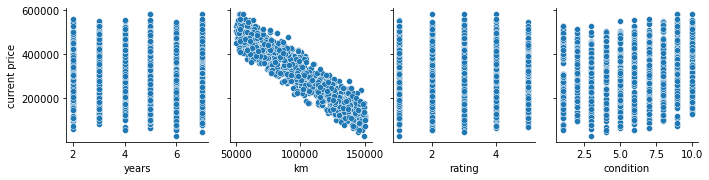

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

sns.pairplot(data, x_vars=['years', 'km', 'rating', 'condition'], y_vars=['current price'])

In [15]:
# Разделение данных на параметры и целевую переменную
x = data[['years', 'km', 'rating', 'condition']].values
y = data['current price'].values

In [16]:
# Создание объекта модели линейной регрессии
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [17]:
print('Коэффициент регресии Coefficients =', model.coef_)
print('Коэффициент смещения регрессии Intercept =', model.intercept_)
print('Коэффициент детерминации (R^2) R-squared =', model.score(x, y)) #Чем ближе к 1 тем больше зависимость

Коэффициент регресии Coefficients = [-1.39266465e+03 -4.04273382e+00 -3.00042177e+02  4.39352902e+03]
Коэффициент смещения регрессии Intercept = 696582.9269389885
Коэффициент детерминации (R^2) R-squared = 0.8858055163854365


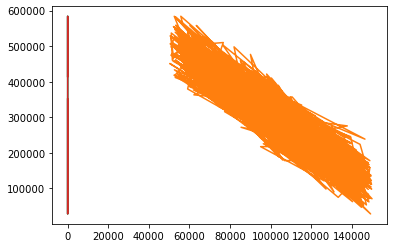

In [18]:
plt.plot(x, y)

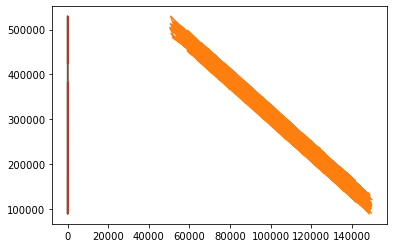

In [19]:
# построение графика прогнозов и истинных значений
y_pred = model.predict(x)
plt.plot(x, y_pred)

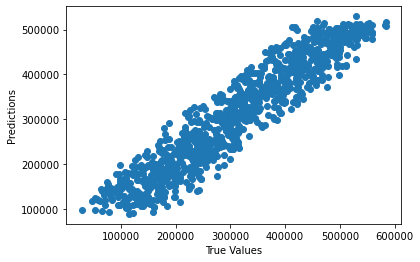

In [20]:
plt.scatter(y, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [21]:
y_pred = model.predict(x)
y_pred

array([381738.32759277, 252379.23121752, 192529.89069978, 294413.7933807 ,
       478001.9226183 , 125423.85801791, 413427.01657397, 387258.85207151,
       483276.69143189, 171334.40773823, 276361.05144271, 221620.48531459,
       513315.08821896, 368160.40706842, 482236.91893801, 445198.05331416,
       202020.54149435, 249530.3543729 , 371285.37811218, 159042.16673622,
       179631.96248894, 398022.75974703, 344484.83579443, 131704.63935607,
       510441.62711039, 430507.45265517, 356577.50819005, 323068.07747477,
       123124.43169041, 311084.48715737, 353078.18446582, 453301.42285759,
       187626.16423399, 119863.68111586, 339845.21835142, 191340.16178719,
       215858.50992586, 500061.80347607, 354980.17683006, 201443.923641  ,
       369732.39787949, 389233.15204753, 274397.71933923, 427824.75187301,
       187484.20670532, 314269.28617632, 306520.62528491, 361828.73896507,
       404382.67407869, 343077.3268889 , 266422.00938385, 169637.24943729,
       466383.37128862, 1

In [22]:
# Оценка качества модели
r2 = r2_score(y, y_pred)
MAE = mean_absolute_error(y, y_pred)
MSE = mean_squared_error(y, y_pred)

print('R2: ', r2)
print('MAE: ', MAE)
print('MSE: ', MSE)

R2:  0.8858055163854365
MAE:  35022.150419786645
MSE:  1813245353.5995257


# Логистическая регрессия
Логистическая регрессия похожа на линейную, но выход ее это не просто сумма произведений параметров и входов со смещением, а некоторая функция от этого. Применяют функцию под названием "сигмоида" или "логистическая функция", отсюда и название модели.

Сигмоида это функция вида: \\(f(x)= \frac{1}{1+e^{-x}}\\)

Нарисуем ее график, позаимствовав эту функцию, назвали `expit()`, из библиотеки [`scipy.special`](https://docs.scipy.org/doc/scipy/reference/special.html)  

Как нетрудно убедиться значения этой функции всегда лежат в пределах от 0 до 1, в нуле принимает значение 0.5. Если бы мы просто в линейной регрессии добавили эту функцию, то никогда не смогли бы моделировать зависимости, у которых выходная переменная больше 1 или меньше 0. Поэтому в логистической регрессии требуют, чтобы и указания учителя были в диапазоне 0...1.

Выход же логистической регрессии: 

\\(\overrightarrow{y}=f(A*\overrightarrow{x}+\overrightarrow{b})\\), где сигмоида применяется поэлементно к каждому компоненту вектора.

Для задач классификации, можно существенно изменить функцию ошибки. Давайте будем рассматривать только бинарную (двухклассовую) классификацию, и будем один класс обозначать величиной 0, второй - величиной 1. Тогда выход логистической регрессии (он от 0 до 1) можно интерпретировать как уверенность модели в том, что вход принадлежит к одному из классов. Выход ближе к нулю - принадлежит к классу 0, выход ближе к 1 - принадлежит классу 1.

Чтобы понять функцию ошибки будем рассуждать так:

Давайте посчитаем, насколько **правдоподобно**, что выход описывает заданный класс: 
* если класс должен быть 0, то правдоподобие для него это единица минус значение выхода модели y (должно быть 0, а получилось y, например выход у=0.3 - правдоподобие 1-0.3=0.7 - правдоподобно, большая уверенность в том, что класс 0; выход у=0.9 - правдоподобие 1-0.9=0.1 - совершенно не правдоподобно, очень маленькая уверенность, что класс 0)
* если класс должен быть 1, то правдоподобие для него это само значение выхода модели y (должно быть 1, а получилось y, например выход у=0.3 - правдоподобие = 0.3 - совершенно не правдоподобно, очень маленькая уверенность, что класс 1; выход у=0.9 - правдоподобие = 0.9 - правдоподобно, большая уверенность в том, что класс 1).

Выше приведены рассуждения для одного примера, если их несколько, то найдем произведение правдоподобий для каждого примера.

Например:
* для хорошего классификатора: получились выходы 0.1, 0.9, 0.8, а должны были получиться 0, 1, 1. Общее правдоподобие (1-0.1) * 0.9 * 0.8 = 0.648 довольно большое;
* для плохого классификатора: получились выходы 0.4, 0.6, 0.5, а должны были получиться 0, 1, 1. Общее правдоподобие (1-0.4) * 0.6 * 0.5 = 0.18 существенно меньше;
* для классификатора-врунишки, который все классы путает: получились выходы 0.7, 0.2, 0.1, а должны были получиться 0, 1, 1. Общее правдоподобие (1-0.7) * 0.2 * 0.1 = 0.006 очень маленькое.

Но работать с произведением маленьких чисел когда их много очень сложно, поэтому от значений правдоподобия переходят к его логарифму. Тогда числа по модулю уже не будут маленькими (но будут отрицательными), а произведение превратится в сумму (вспомните свойства логарифма).

Значения, которые мы подставляли для правдоподобия зависят от того, какой класс должен был получиться. Чтобы эти условия "если..." реализовать в одной формуле, можно поступить так:
- когда класс равен 0 нам нужно использовать \\(ln(1-y)\\), когда класс равен 1 нам нужно использовать  \\(ln(y)\\).
- запишем такую формулу: \\(t*ln(y)+(1-t)*ln(1-y)\\), где t (0 или 1) наш класс.   
- тогда при t=0 остается второе слагаемое \\(ln(1-y)\\), а при t=1 остается только первое слагаемое \\(ln(y)\\), как мы и хотели.

Итак, общее правдоподобие нашей модели:

\\(E=\sum_{i=1}^{P} (t(x^i)*ln(y(x^i))+(1-t(x^i))*ln(1-y(x^i))\\
x^i : i-ый\ пример\ входа\\
t(x^i) : указание\ учителя\ для\ него\\
y(x^i) : выход\ модели\ для\ него\\)

Правдоподобие нужно максимизировать, поменяем знак, можно минимизировать. Функция ошибки здесь это минус правдоподобие модели. Похожую формулу можно записать и для случая, когда классов больше чем два, но сейчас мы не будем этого делать. 

В функцию ошибки часто добавляют дополнительные члены, регуляризаторы, которые вводят некоторые ограничения, например чтобы величина параметров была не очень большая. Это бывает и полезно и вредно для обучения. Мы не будем трогать параметры по умолчанию, пока не придется.

Обучается такая модель методами на основе градиентного спуска (чистым градиентным спуском пользуются редко, обычно используют всякие его модификации, в которых, например, могут управлять величиной шага обучения или др.). Какой именно метод используется здесь для наших уроков не принципиально. 

В `sklearn` логистическая регрессия задается с помощью [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) у которой есть такие же методы как и у `LinearRegression()` и некоторые специфичные аргументы:
* tol - точность до которой нужно обучать модель
* C - 1/коэффициент важности регуляризуещего члена в функции ошибки
* penalty -  вид регуляризации, 'none' если хотим отключить регуляризацию (по умолчанию включена)
* solver - название метода обучения, не будем трогать.
* max_iter - максимальное количество итераций для обучения

*Примечание: формулы приведенные для [`LogisticRegression`](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) в документации, отличаются от наших, поскольку они выведены для случая когда желаемый выход +1 или -1, а в наших 0 либо 1.* 

Для логистической регрессии метод `predict()` возвращает классы (0 или 1 в нашем случае).

Чтобы вернуть выход используем метод `predict_proba()`. Он вернет величины правдоподобия для класса 0 (единица минус выход) и 1 (выход). 



## Понятие разделяющей поверхности
Выше мы рассмотрели линейную и логистическую регрессии. Если мы используем  их для классификации, то вводится некоторое правило, как относить выходы к классам, например для двух классов для линейной регрессии можно считать так: если выход меньше нуля, то первый класс, если больше - второй. В логистической регрессии принято выбирать такой класс, для которого уверенность максимальна. Как именно относить выходы к классам это наш выбор, в некоторых библиотеках реализована возможность задать порог для такого отнесения, в некоторых нет, тогда используются наперед заданные значения. 

Давайте зададимся таким вопросом. Пусть решаем задачу бинарной классификации, есть примеры входов в двумерном пространстве, и мы обучили на них линейную и логистическую регрессии. Если мы, после обучения, проверим классы выдаваемые этими моделями для всех точек двумерной плоскости, то какую картину мы увидим? Давайте нарисуем.

Мы видим, что плоскость разделилась на две области, в одной все точки приняты за первый класс, в другой - за второй. Если присмотреться, то граница раздела между этими областями это **прямая линия**. Какие бы данные вы не подавали, как бы не обучали линейную регрессию, она всегда будет разбивать плоскость на две части - полуплоскости (для бинарной классификации). Аналогично в многомерном случае, но теперь граница раздела будет не прямой линией, а гиперплоскостью. Такая граница называется **разделяющая поверхность** и для линейной регрессии является гиперплоскостью. Можете убедиться в этом, ведь уравнение этой поверхности - границы раздела - это условие что выход равен нулю. Подставьте в уравнение выхода линейной регрессии и увидите, что получилось уравнение гиперплоскости. **В линейной регрессии разделяющая поверхность - линейная**, ее можно нарисовать.

А что для логистической регрессии? Постройте аналогично, и увидите, это для нее, хотя выход логистической регресси нелинеен по входам, разделяющая поверхность тоже линейная. Сама поверхность может отличаться от поверхности для линейной регрессии, но все равно она является линейной. 

Для случаев трех и более классов, разделяющая поверхность будет кусочно-линейной, состоять из частей гиперплоскостей. Постройте самостоятельно для случая трех классов.

Чтобы в линейной регрессии закодировать три и более класса, можно поступить так: давайте сделаем выход многомерным, размерность его равна числу классов; пусть все элементы вектора указаний учителя равны нулю кроме одного. Элемент вектора указаний учителя с номером совпадающем с номером класса равен 1. Такое кодирование называется one-hot кодирование (иногда бинарное кодирование). Например для трех классов можно закодировать указания учителя так: первый класс - вектор (1, 0, 0);  второй класс - вектор (0, 1, 0); третий класс - вектор (0, 0, 1). Для линейной регрессии можно использовать и другие числа, например: первый класс - вектор (+1, -1, -1);  второй класс - вектор (-1, +1, -1); третий класс - вектор (-1, -1, +1) или аналогичные. Для логистической регрессии значения выходов и указаний учителя должны быть от 0 до 1. 

Относить выход к классу можно, как вариант, по максимальной близости вектора выхода к заданным векторам классов, например: выход (0.9, 0.1, 0.1) ближе всех к (1, 0, 0), а значит относится к первому классу. Можно придумать и другие способы. 

Вопрос, а как бы вы интерпретировали выход (0.5, 0.5, 0) ? 

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# загрузка данных
data = pd.read_csv('train.csv')
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [38]:
# Разделение данных на параметры и целевую переменную
x = data[['years', 'km', 'current price', 'condition']].values
y = data['rating'].values

In [39]:
# создание и обучение модели логистической регрессии
model = LogisticRegression()
model = model.fit(x, y)

In [40]:
# оценка качества модели
score = model.score(x, y)
print("Accuracy: {:.2f}%".format(score*100))

Accuracy: 21.70%


In [41]:
# предсказание на тестовой выборке
y_pred = model.predict(x)

for i in y_pred:
    print(i)

4
2
2
2
4
2
4
4
4
2
3
2
4
4
4
4
2
2
4
2
2
4
4
2
4
4
4
4
2
4
4
4
2
2
4
2
2
4
4
2
4
4
3
4
2
4
4
4
4
4
2
2
4
2
2
4
4
4
4
4
2
2
2
4
4
2
4
4
3
3
2
4
4
4
2
3
2
2
4
2
4
4
3
4
4
4
2
4
4
4
4
2
4
2
3
2
4
2
4
2
4
4
3
4
4
4
4
2
4
4
4
4
2
4
2
2
4
2
3
3
4
4
2
2
4
4
4
2
4
4
2
4
2
4
4
2
2
4
2
2
4
2
2
2
4
4
4
2
2
2
4
2
4
2
4
3
3
2
4
4
4
4
2
4
2
4
2
2
4
4
4
3
2
4
2
4
2
4
4
4
2
2
2
2
2
2
4
2
2
4
2
4
4
4
2
4
4
2
2
4
2
4
4
2
2
4
2
4
4
2
2
4
4
4
4
4
2
2
2
4
4
2
4
2
4
2
4
4
4
4
4
3
2
4
4
2
4
4
4
4
4
4
3
2
4
2
4
4
4
2
4
2
1
2
2
4
2
4
2
4
4
4
2
2
4
4
3
4
2
4
4
4
4
2
4
2
4
2
2
2
4
3
4
2
4
2
3
4
4
4
2
2
2
2
2
4
2
2
2
4
4
4
4
4
2
4
2
2
4
4
4
4
4
4
4
4
2
4
4
2
4
2
2
4
4
2
2
4
2
4
4
2
2
4
4
2
4
4
4
2
3
4
4
2
4
2
2
4
2
4
4
4
2
2
4
2
2
2
4
2
4
2
2
4
4
2
4
2
4
4
4
4
4
2
4
4
4
4
4
4
2
2
2
4
2
4
2
4
4
2
4
4
3
4
4
4
4
4
2
4
2
2
2
2
4
2
4
2
4
4
2
4
2
2
2
2
4
2
4
4
2
4
4
4
2
4
4
2
2
2
2
4
2
2
4
4
4
2
1
4
4
4
4
2
2
2
1
2
4
2
2
1
2
2
4
4
4
4
4
2
4
2
4
2
2
4
2
2
4
2
4
2
4
2
4
4
2
4
2
2
4
2
4
3
2
2
4
4
2
4
3
4
2
2
4
4
4
2
2
4


In [42]:
# получение вероятностей принадлежности к классам на тестовой выборке
y_proba = model.predict_proba(x)
y_proba

array([[0.19682276, 0.18868693, 0.20866075, 0.21441451, 0.19141505],
       [0.20364871, 0.20395419, 0.20268398, 0.2007344 , 0.18897872],
       [0.20774185, 0.21421321, 0.19826862, 0.19173071, 0.18804561],
       ...,
       [0.19575486, 0.18587625, 0.21034141, 0.21763766, 0.19038982],
       [0.21312584, 0.22955267, 0.1911253 , 0.17854468, 0.18765151],
       [0.19308311, 0.18051629, 0.21220202, 0.22254935, 0.19164924]])